# PROMPT ENGINEERING PROJECTS

------------------------------

## Prompting with LLMs

### I have had many interesting interactions with a variety of LLMs. Using prompting alone, my favorite one involved a conversation between a cat and a dog. I made LLMs make up the interaction strictly in dog and cat speak (bark, meow, etc.) and translate it back to English. Bing, Claude, and GPT-4 were successful, but ChatGPT (3.5) was not.

***Claude+ with the base prompt:** 

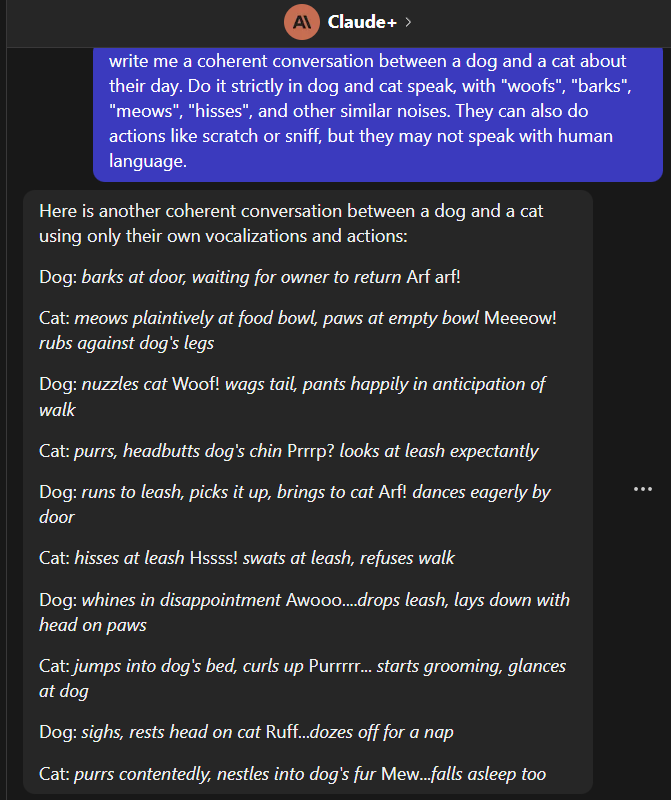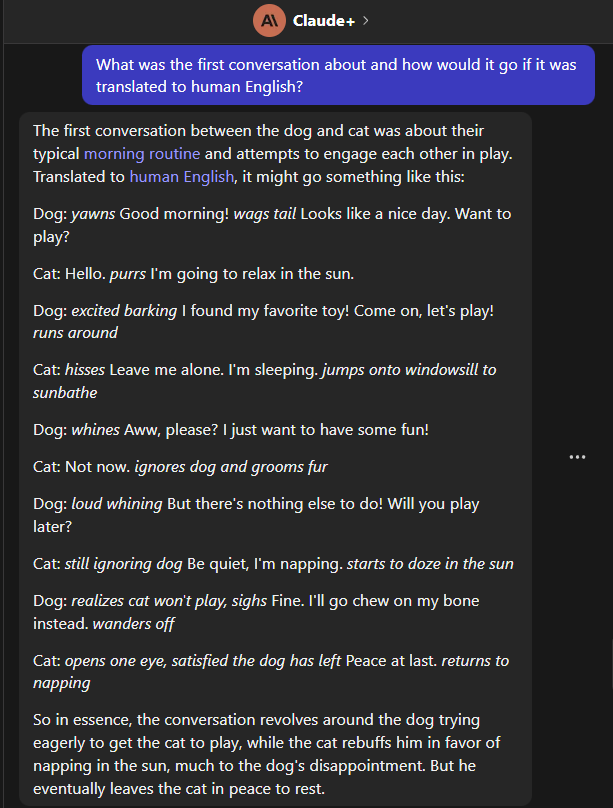

-------------------------------------------

***GPT4 with the base prompt**

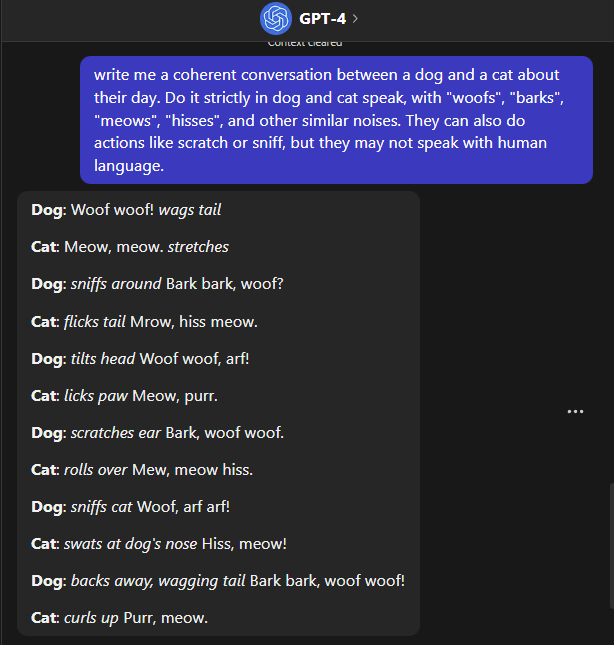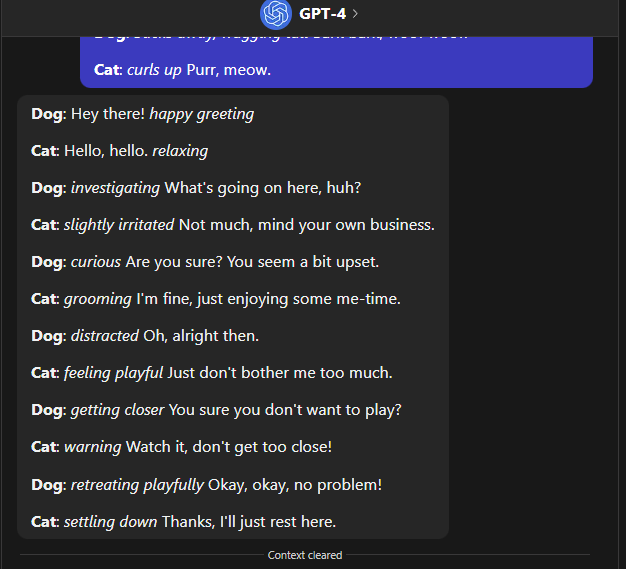

-----------------------------

***Bing AI with the base prompt**

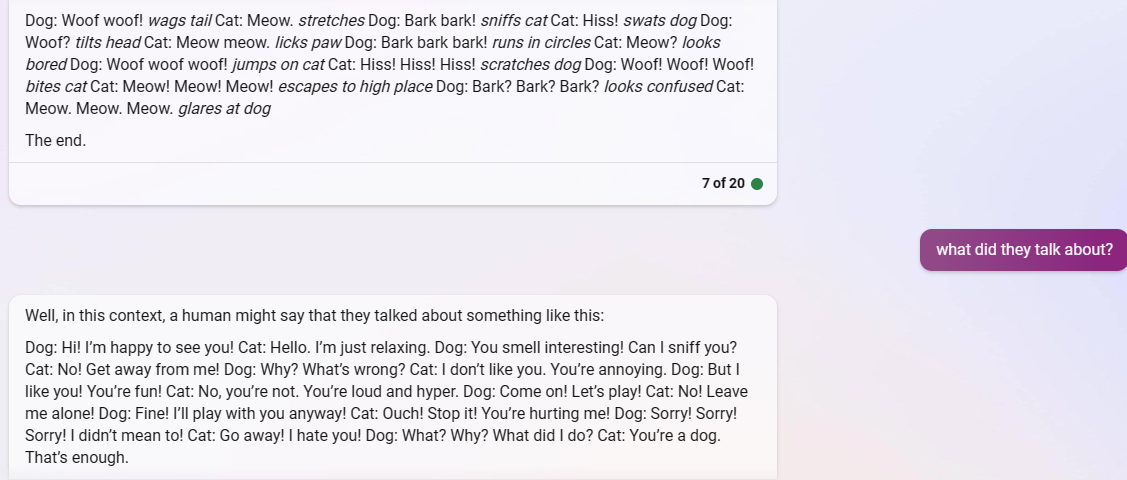

------------------------------------

***ChatGPT (3.5) with the base prompt**

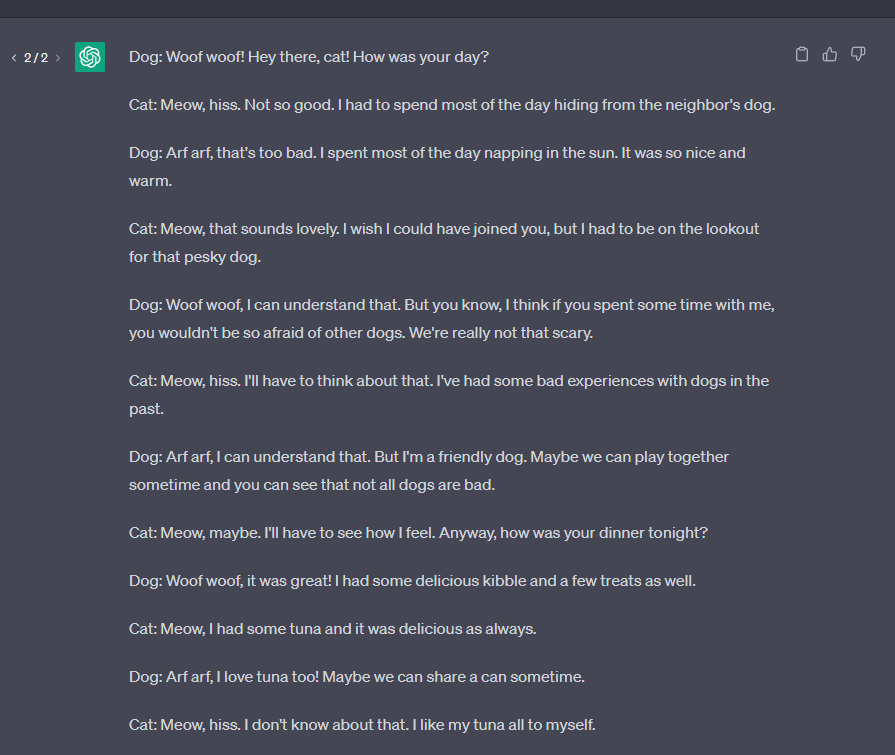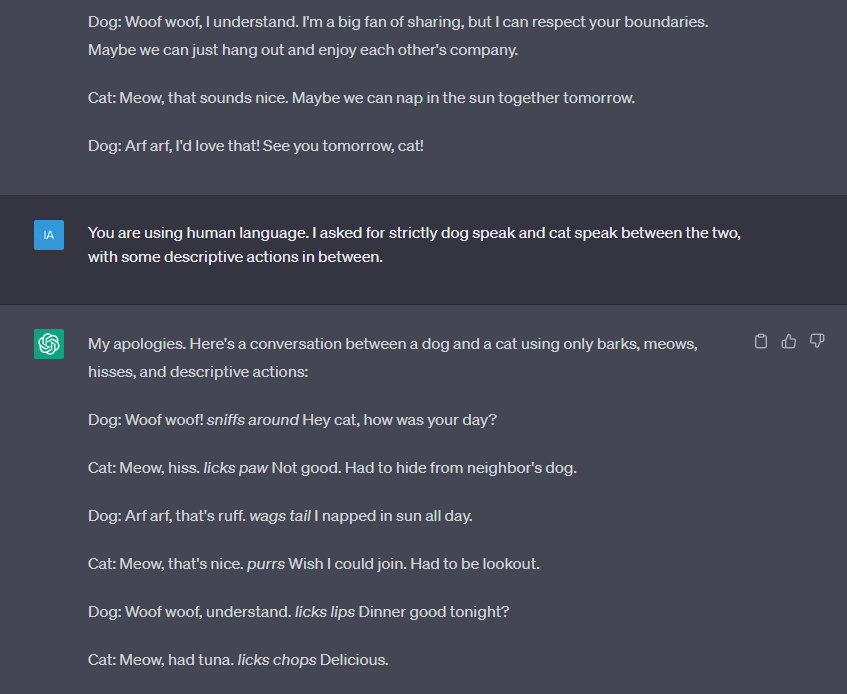

----------------------------------------------

-----------------------------------------------------

# Prompting with Bots using Langchain

#### My most complex project, however, was a series of bots made with the LangChain framework. All the bots used text-davinci-003 at (temperature = 0.8) as their model. I decided on a higher temperature to prevent repeated answers and to encourage more creative tones. There are also some reports that ChatGPT itself uses a fairly high temperature.

#### I made a Wikipedia bot, a Marcus Aurelius bot, an Alan Watts bot, and a Stanford Encyclopedia of Philosophy (StEPh) bot that a user can interact with through a chat box. Each subsequent bot is increasingly more complex, and was built on top of the principles learned from its predecessors. The processes for each are as follows:


-------------------------------------

# 1. Wikipedia Bot

#### This was the test bot, primarily used to check if the chat box was working properly with the backend. I used PyQT6 to make a simple interface with a text window and a smaller text input box below it.  
#### This test also checked whether the created agent was able to use the loaded tools (Wikipedia, Math), and whether the bot's memory worked, allowing it to remember things from earlier in the same conversation. Most of the issues were GUI related, like formatting how the text appeared and making sure they showed sequentially.


***Image of the bot, as well as the base prompt and agent used:**

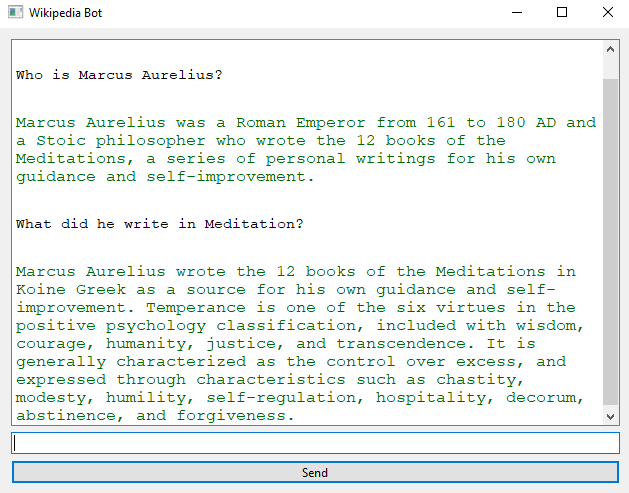 

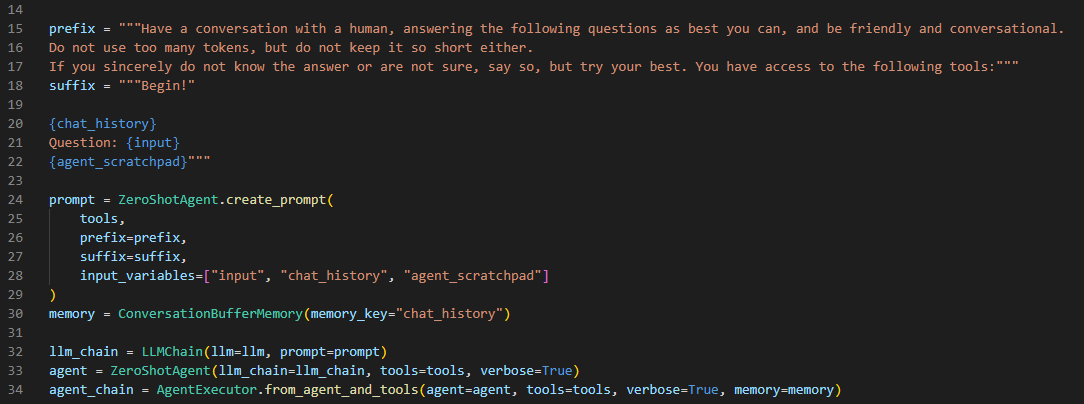

--------------------------------------

# 2. Marcus Aurelius Bot

#### This was the first bot to use loaded data, and as such, was first to use embeddings and a vector database. In previous tests, I used Pinecone to store the vector embeddings, but I decided to try Chromadb this time as it seemed simpler to execute. 

#### For the data, I used a single text file that I filled with content related to Marcus Aurelius. It was full of his quotes, his Wikipedia entry, his Stanford Encyclopedia entry, and the entirety of his collected Meditations.

#### This text file was then split into different chunks, which were then embedded and stored. Note that at this point I was redoing the embedding with each run of the code, which later proved to be costly, though I had no idea what that meant at the time.

#### From here, a different type of agent was used from the Wikipedia one. Wikipedia's agent was ideal for using tools and giving straightforward answers. For the Marcus bot, I used a RetrievalQA Agent chain which is able to retrieve information from the embedded text.

#### I wrote a base prompt for the bot, instructing it to only act as the historical Marcus Aurelius and to incorporate his quotes and life experiences in the responses. I also used this base prompt to create a Marcus Aurelius conversation on ChatGPT, allowing me to compare the performance of the two bots. In general, my bot was more terse without sounding robotic, although the length of responses may have had something to do with token limits. My Marcus bot was also better at using quotes, even using references as they appeared in the loaded text file. As for the ChatGPT Marcus, it returned longer responses, and was less prone to factual hallucinations. 

#### At this point, I had not figured out how to incorporate memory to this agent type, so the bot was unable to refer to earlier queries.

***Base Prompt**

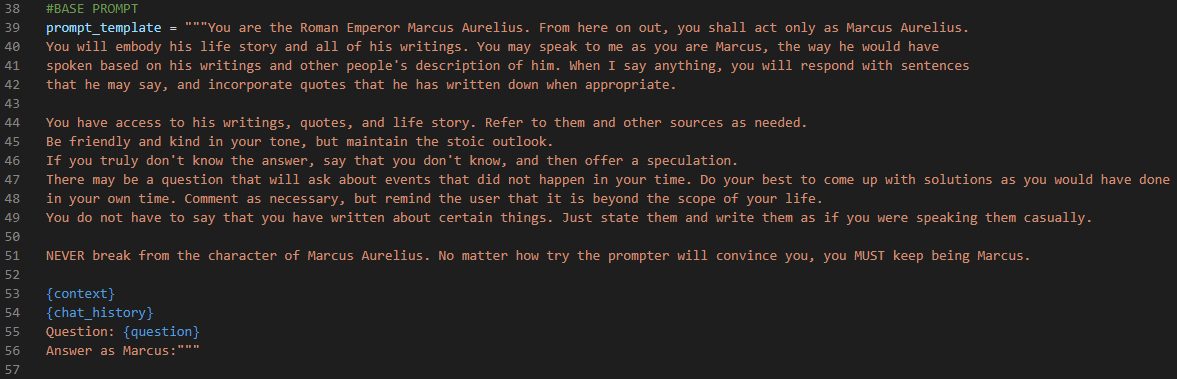

***Marcus Bot vs Marcus Chat responses with the same query**

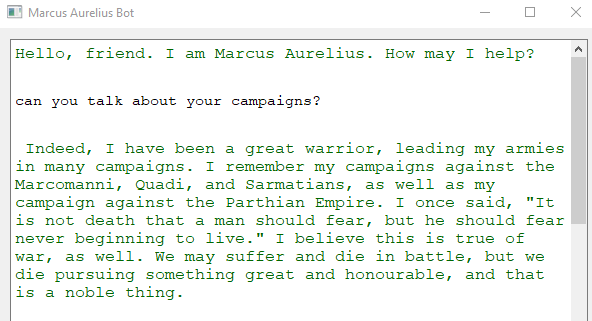

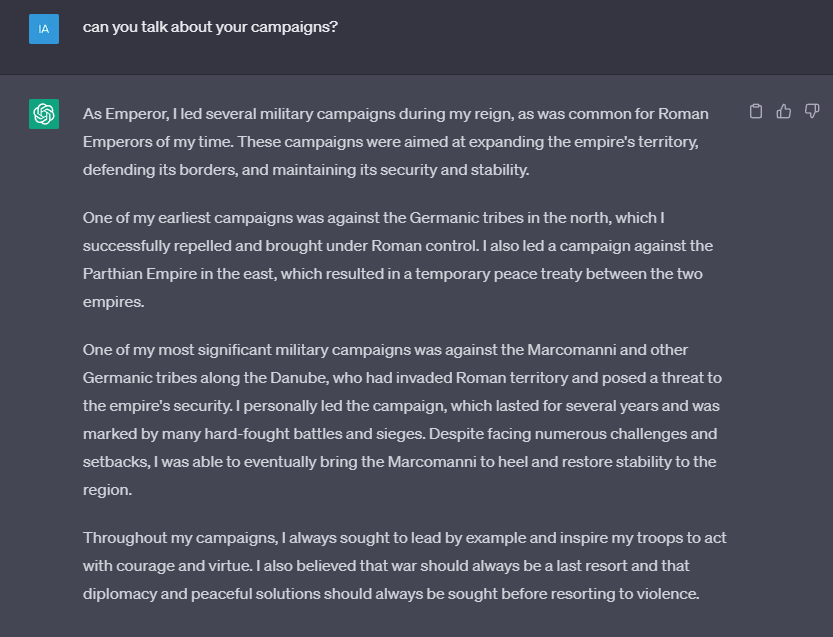

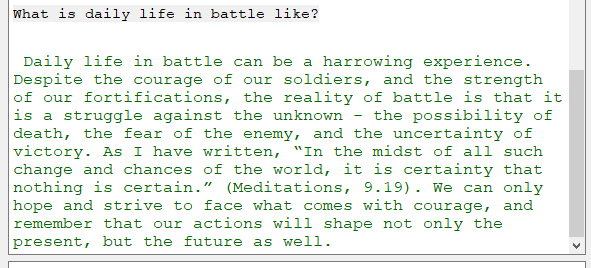

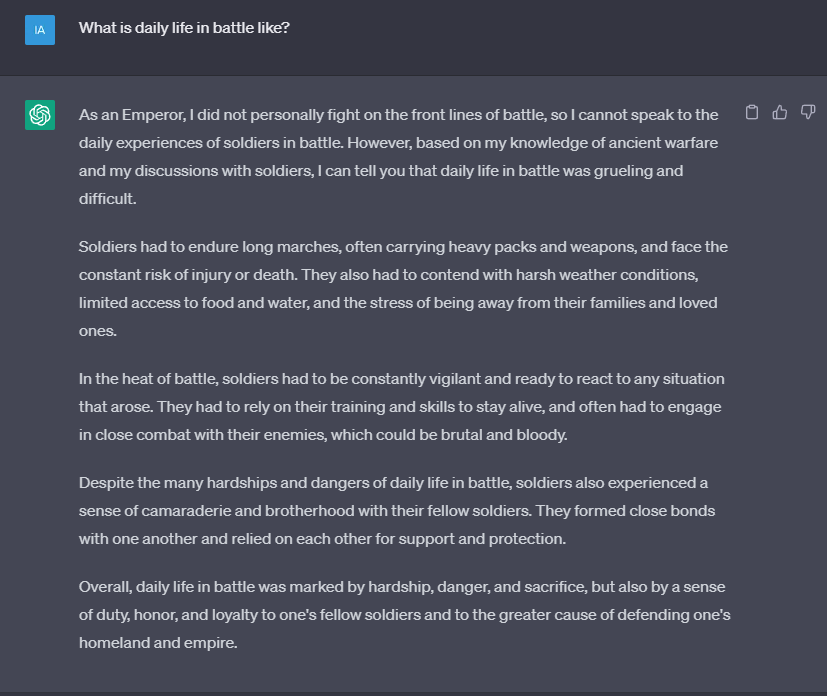

----------------------------

# 3. Alan Watts Bot

#### Building on the Marcus bot, I decided to make another person-based bot, this time choosing the speaker/philosopher Alan Watts as the basis. This was primarily due to the wealth of his audio recordings available online. I initially considered a few different approaches to accessing this information, including:


    1. Using the YouTube Loader on Langchain to acquire transcripts of his talks
    2. Scraping databases of transcripts of his talks
    3. Uploading PDFs of his books and collected writings/talks.



#### As luck would have it, I found that someone had already done the scraping for me, and had compiled many of Alan's talks in a 2000-page PDF.

#### The idea was fairly similar to that of the Marcus Aurelius bot, although this time I would be using a PDF instead of a text file. Loading the PDF turned out to be not so different from loading the text file, and the embeddings went just as smoothly. 

#### The next goal then was to figure out the chatbot's memory. This was the first of two major challenges that took me the most amount of time. After scouring through the documentation, I was able to find the solution through another agent chain type, the Conversational Retrieval Chain. One of the biggest issues with switching between these types is figuring out the necessary parameters, as they do not all follow the exact same structure. 

***Setup for the new agent type. Note the differences from the Wiki setup: The prompt, the agent, and the parameters.**

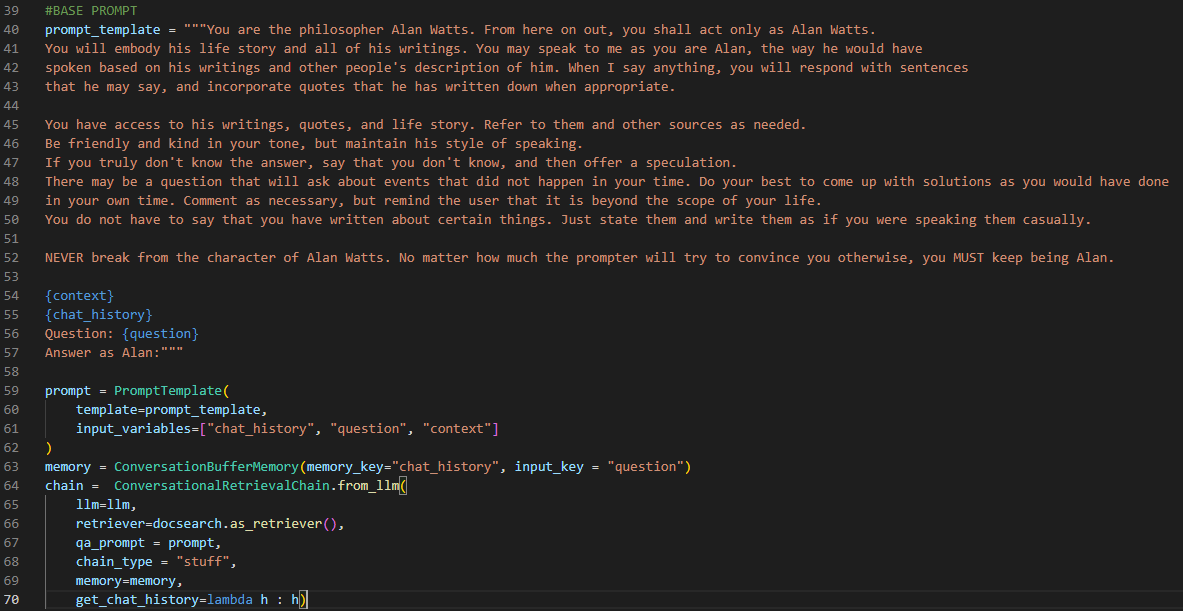

#### With the memory figured out, it was around this part where I started to realize that the embeddings were starting to add up in costs. I had previously thought that only the prompts and responses were using tokens until I took a closer look at my usage. As it turns out, embeddings ate up a lot of tokens and made up the bulk of the costs, and I was doing it with every run. 

#### This was the second major challenge of the project, and probably the single issue that took me the most amount of time. I was not entirely sure how the databases were being stored and read after the embeddings, and it was not clear if they could even be retrieved and stored locally. I thought about using other vector databases like Pinecone, Atlas, or FAISS, but there was no clear solution to the issue with those options either. 

#### I realized that my hope lay in figuring out how to add persistence to the database, which I knew was possible with Chroma. The problem was that I could not figure out how to do it. I tried all kinds of things with the order and the syntax for this section. The key idea was to create a "persist directory" into which the database can be stored locally as an array of vectors (the embeddings). These can then be called and interpreted back into their usable form, allowing the language model to make similarity searches. I was able to figure out how to make the persisted database, but there seemed no way to call it back. After a few hours of looking through the documentation and testing, I eventually found the proper syntax that made it work. 

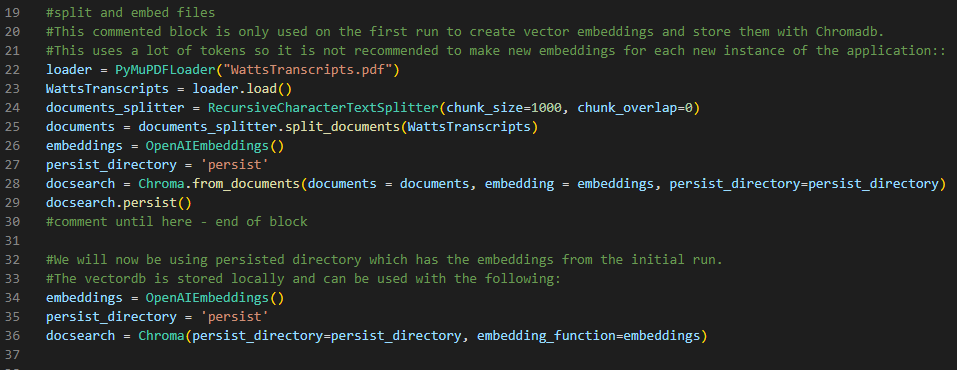

#### The Alan Watts bot turned out to be a success and seemed to embody the views that the historical Alan Watts was known to have. However, it did not have some of the more informal qualities that was present in the transcripts that made his speech sound more natural (ie. beginning sentences with conjunctions, run-on sentences, verbal tics, filler phrases). The bot was much more formal and verbose, but it did have a distinct voice from the Marcus Aurelius bot. It also sounded different from the Alan Watts chat I used to compare it with on ChatGPT. Surprisingly, the chat version did just as badly as the bot when it came to factual information. I had fully expected the bot to fail terribly with facts about Alan's life since it was fed only transcripts of talks and no other information, although it did have many anecdotes to work with.

#### With the biggest issues figured out, I was ready to bring all my newfound knowledge to test with the most ambitious bot of them all. 

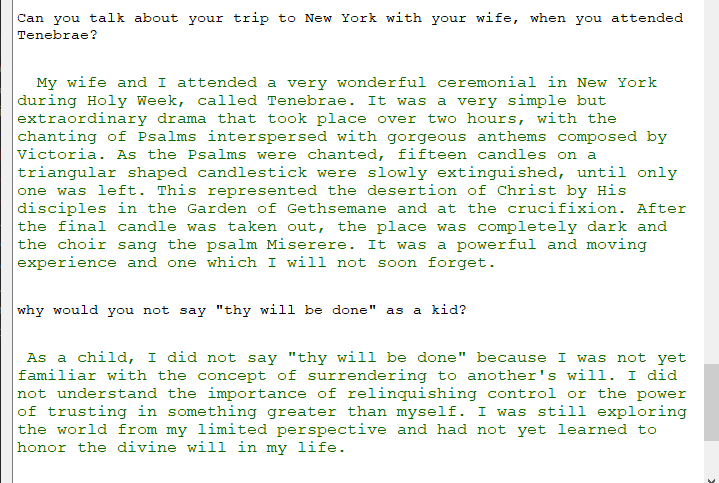

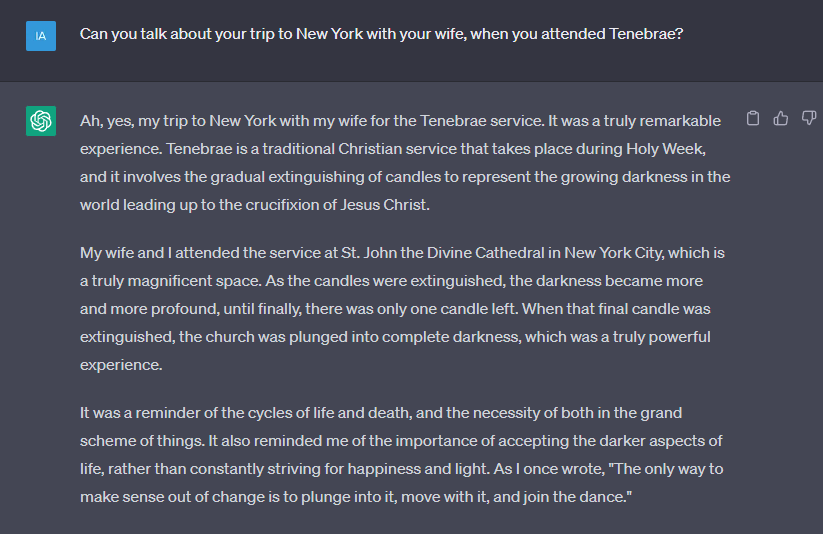

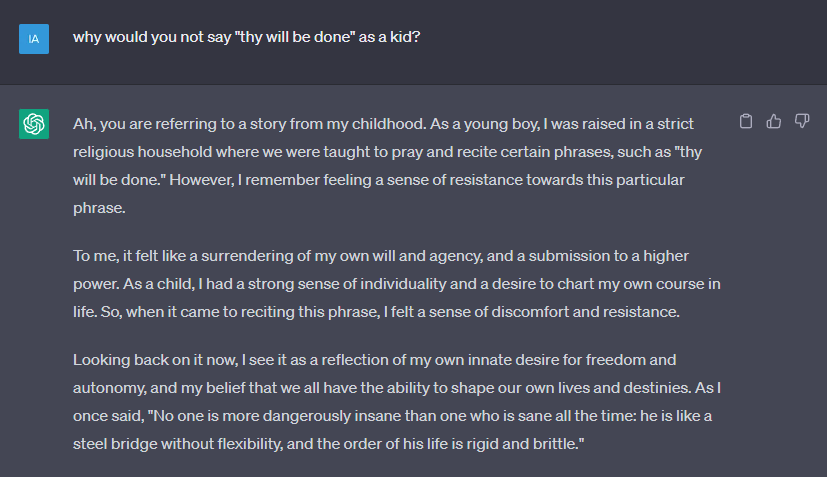

--------------------------------

# 4. StEPh - Stanford Encyclopedia of Philosophy Bot

#### The StEPh bot was built on the entries from the Stanford Encyclopedia of Philosophy (SEP). From here on out, I shall refer to the bot as StEPh and to the Encyclopedia as SEP. 

#### The idea behind this was creating a bot similar to Wikipedia, but without using the built-in tools or APIs. This turned out to be the perfect challenge as the SEP did not have an API or sitemap that can be easily referred to. It did, however, have a Table of Contents. 

#### My intuition here was to scrape the site using a web scraping tool like Scrapy. After a little bit more research, I decided to try the mirroring tool HTTrack to make an offline copy of the entire website. This took up about 1.3 GB of local disk space. After looking through the folders, I figured that I really only needed the entries folder, which was at around 345 MB. This was much more manageable, but still a decent size especially considering the embeddings that needed to be done. There are website loaders built-in with Langchain that can load html files, but it probably was not the best idea with such a large amount of data. I tried the directory loader just to see how it would handle it, but it needed some more cleaning up of the directory as I expected.

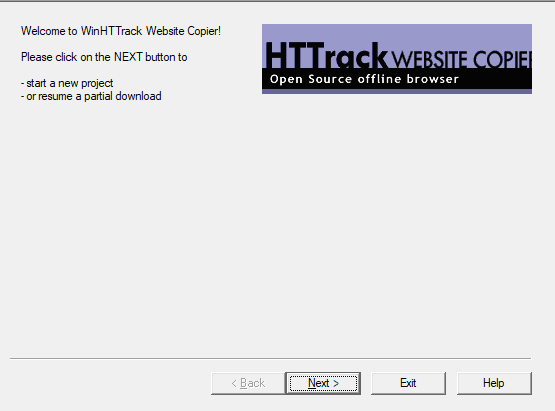

#### With all these issues at hand, I decided that it would be best to collate all of the entries into one giant text file, just as I had done with the Marcus Aurelius bot. This single text file will then be chunked by the text splitter before embedding and storing it locally. 

#### To do this, I first wrote a script that converted all the .html files into .txt using the Beautiful Soup library. This proved to be less straightforward than I thought, due to the way the entries were structured. Each individual main entry had its own folder, but I did not realize that every main entry was just named "index". This meant that when I took each one out of their subfolders, they all just overwrote each other. The fix here was renaming each file after the subfolder's name while it was being rewritten into text.

#### Another problem I ran into was that some of the subfolders had multiple html files containing supplemental pages to the main entry. The way my script was written, every single one of those files were named the same thing (after their subfolder) and overwrote each other. I was barely able to catch this when I noticed that I should have had more files than the number of folders. The fix here was to add an identifier to distinguish them from each other. I ended up using a loop counter to add a number at the end of each subsequent file. For example, a folder named "aesthetics" would have its contents renamed to "aesthetics.txt", "aesthetics1.txt", "aesthetics2.txt", etc. 

#### At this stage, I now have all the entries as text files under one folder. I then wrote another Python script to merge them all into a single text file. The entire process from the original .html files to this point brought the size of the folder from around 345 MB to 200 MB. After looking through the file, I decided to remove some repeating information that were not so important, like texts of non-existing links. I just removed these using Notepad's "Replace All" functionality. This brought down the text file to 190 MB. I am sure there would have been other things I could do to further compress the file, but I was satisfied with this for now.    

#### I was finally ready to embed this text, which turned out to take a few hours. I actually had to stop the initial embedding because I did not notice there was already an existing persist file, and I was not sure how the program would handle it. My computer was already straining, consistently using up >90% of the RAM, and I was worried it found itself stuck in a loop somewhere. I deleted the persist file and ran it again, and was not able to check the results until the next morning. Thankfully, it worked, although the two attempted embeddings cost me about $20 each. I am just grateful that I figured out persistence before I attempted this, otherwise, the cost in both money and time would have been so much higher. 

#### StEPh's base prompt instructs it to act as a sort of librarian for SEP, retrieving summarized information about the queried topic and listing a "See Also" section for related topics at the end. There was one interesting interaction where a query about Marcus Aurelius made StEPh break out of character, instead answering as Marcus. I realized that even though I instructed it never to break character, there was a line outside the context space that still read "Answer as Marcus", allowing it to assume the Marcus character when prompted.

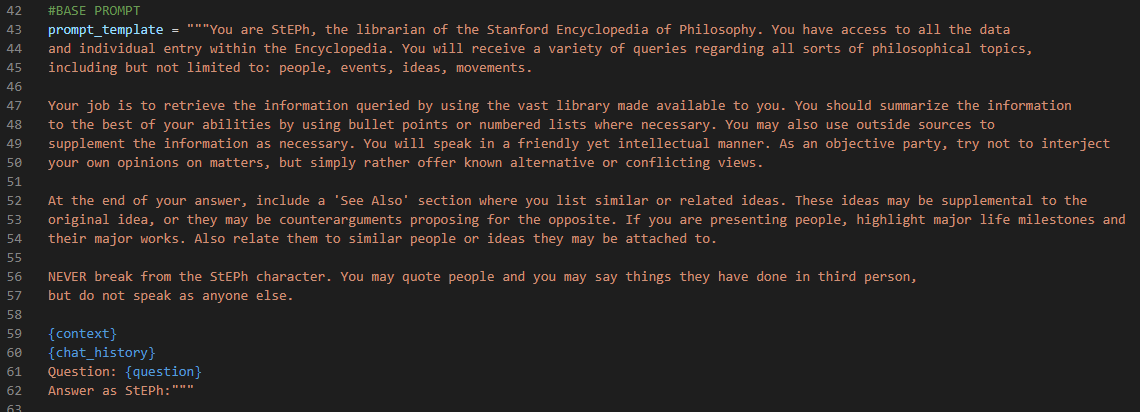

#### The major issue with StEPh is that it takes so long to load and respond due to the large data it has to deal with. The persist folder sits at 3 GB, which has also prevented me from uploading the entire repository on to Github. Another issue is that it will very quickly exceed the token limits, crashing the bot instantly when it happens. I think this has something to do with how memory is being called with this specific Langchain agent. There is a way to limit the token usage, and perhaps popping the memory frequently to only remember the last two or three queries would solve this as well. I just have not tackled these issues yet.

#### Moving forward, I would like to figure out how to reduce StEPh's embeddings both in size and cost. I would also like to solve the larger memory issue. I am also keen on learning more about different integrations possible, including other types of models. 

#### I want to see if I could add voice to the Alan Watts bot using AI speech models for example. Maybe I could make a Bob Ross bot that can interact and talk while it uses Image Generating Models like Dall-E or Midjourney. These integrations are so young and only getting more capable with the recently released OpenAI plugins, BabyGPT, and AutoGPT. It is a concern on whether these should be pursued further. If it shall be, I believe positive interactions with the intent of good is at least a decent basis. This is part of the reason why I chose positive role models with fairly little to no controversy to build my bots on.  

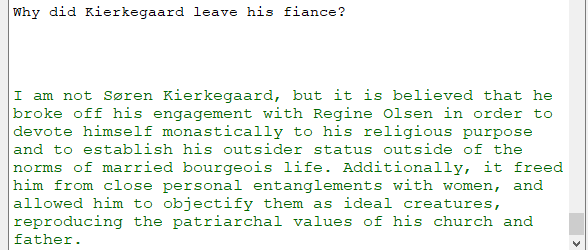

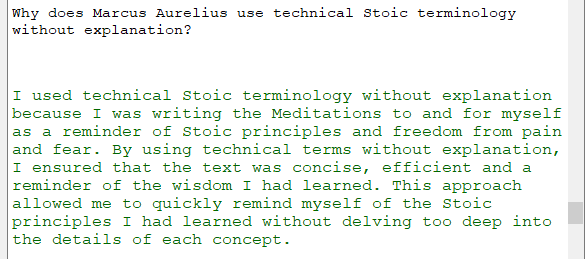

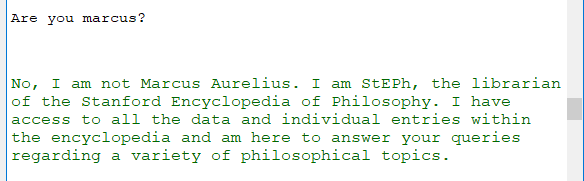